# Hands-on-data #5

The goal of this assignment is to familiarize yourself with clustering approaches using RapidMiner.

When submitting the assignment, include a text document answering the questions as well as RapidMiner process files (or files associated to the tool you used to create the models) for each question.

In [1]:
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a5 = pd.read_csv('./data/Assignment-5.csv')
gaming = pd.read_csv('./data/Gaming-clips.csv')

## Q1 – (2 points)

*Use the k-Means clustering approach (“k-Means” operator in RapidMiner) to generate clusters for the data set called [Assignment-5.csv](data/Assignment-5.csv). Start with k = 1 and iteratively increase the number of clusters until you find a logical stopping point. For each value of k, provide an image of the clusters and write a short paragraph (2-3 sentences) describing the clusters (what structure was or wasn’t found in the data using the specified value of k). Report the selected value for k and explain why that value was selected.*

In [3]:
def plot_kmeans(data:pd.DataFrame,k:int,ax):
  """Plots k-means for data in the `ax` subplot.

  :param data: dataframe with x and y features
  :param k: number of clusters
  :param ax: subplot axis
  """
  labels=KMeans(n_clusters=k,n_init='auto').fit(data).labels_
  ax.scatter(data['x'],data['y'],c=labels)
  ax.set_title(f'{k}-means')

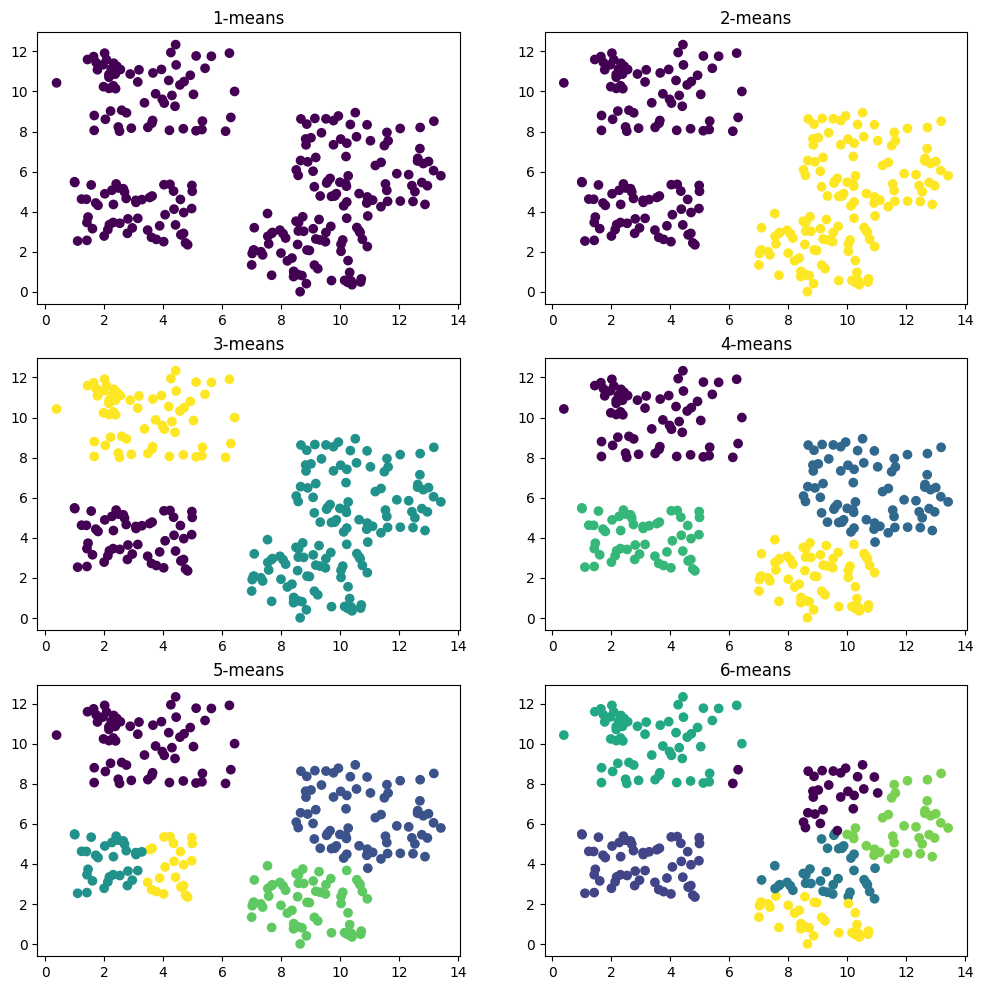

In [4]:
fig, ax=plt.subplots(nrows=3,ncols=2,figsize=(12,12))
k=1
for b in range(3):
  for a in range(2):
    plot_kmeans(a5,k,ax[b,a])
    k+=1

### k=1

With only one cluster, all the points fell into it.

### k=2

2 clusters provide a better division of the points. Visually, we see that the colors clearly separate the two groupings of points on the left and right side.

### k=3

The left side of the data is divided into 2 clusters. This makes logical sense, as there is a visible separation between the 2 groupings found by the algorithm.

### k=4

I believe 4 clusters provide the optimal division for the data. The 4 groupings of the data are very clear, and further divisions (increasing k) seem to inconsistently subdivide the clusters created by 4. In other words, data points would be clustered differently in different runs, whereas in k=4 points are generally grouped in the same cluster in different runs of the algorithm.

## Q2 – 
Use a clustering to explore the [gaming-clips.csv](data/Gaming-clips.csv) dataset.

## Q2.1 – (1 point)

*Pick 2-3 features to explore using clustering. Justify your choice of features, describe why you chose them and what you would expect to find using clustering. You can use both a visual justification (i.e., they seem like they would be more likely to be related) and/or a rationale argument (i.e. explaining why you think studying the relationship between those features would be interesting.*

I have selected the features `Number of Unique Input` and `Number of help requests`.

These two features could help identify gaming behavior. Students with few unique inputs and high help requests could be exhibiting gaming behavior (i.e. they ask for hints before attempting different strategies).

I imagine there could be a relationship between these two features that groups students into clusters.
The basic group I imagine will come up is that of students with a high number o unique inputs and a low number of help requests.
That seems to be the most common type of student.

The "possibly gaming" students might cluster together as having a high number of help requests and a low number of unique inputs.

I am curious to see what other clusters the algorithm might find.

## Q2.2 – (1 point)

Apply the k-means clustering approach to the selected features. Describes all the steps you’ve taken in deciding on a final number of clusters k.

In [5]:
f1 = 'Number of help requests'
f3 = 'Number of Unique Input'
g_cluster = gaming[[f1,f3]]

In [6]:
def gaming_kmeans(g:pd.DataFrame,k:int,ax,c1,c2):
  labels=KMeans(n_clusters=k,n_init='auto').fit(g).labels_
  ax.scatter(g[c1],g[c2],c=labels)
  ax.set_xlabel(c1)
  ax.set_ylabel(c2)
  ax.set_title(f'{k}-means Gaming')

def plot_gaming(k: int,c1,c2):
  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot()
  gaming_kmeans(g_cluster,k,ax,c1,c2)

In [7]:
gaming.columns

Index(['gaming clip', 'student', 'batch', 'is gaming?', 'AvgTimrPerAction',
       'Number of Context Changes', 'Number of Correct Actions',
       'Minimum time between actions',
       'Number of actions faster than average for clip',
       'Number of duplicated inputs', 'Has 3 or more duplicated inputs',
       'Number of help requests', 'Has 3 or more help requests',
       'Number of Wrong Actions', 'Number of consecutive help requests',
       'Sum of frequency of wrong + frequency of consecutive help',
       'Number of BUG',
       'Number of actions slower than the global average action time (~13 seconds)',
       'Number of consecutive wrong in the same context', 'Help Request Rate',
       'Count of short action (3 seconds or less)', 'Number of Unique Input',
       'Number of Blank Actions', 'Number of Hint_without_attempt',
       'Avg_Time_Per_Incorrect_Actions'],
      dtype='object')

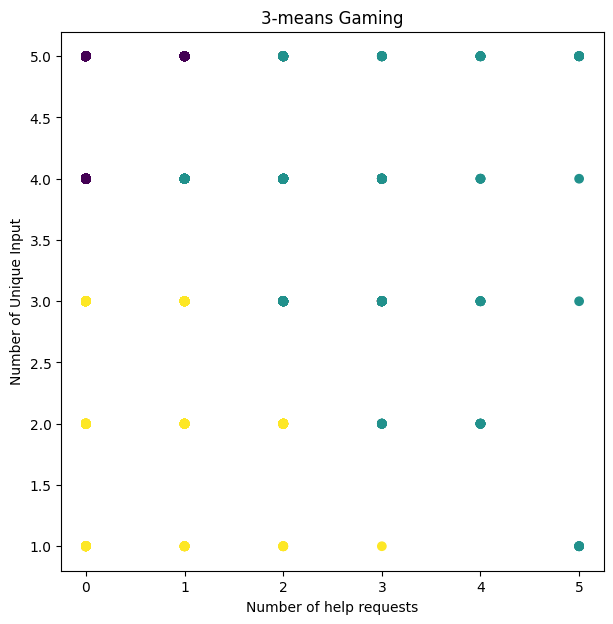

In [33]:
plot_gaming(3,f1,f3)

C:\Users\rmora\AppData\Local\Temp\ipykernel_19632\1446995217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g_cluster['count']=1


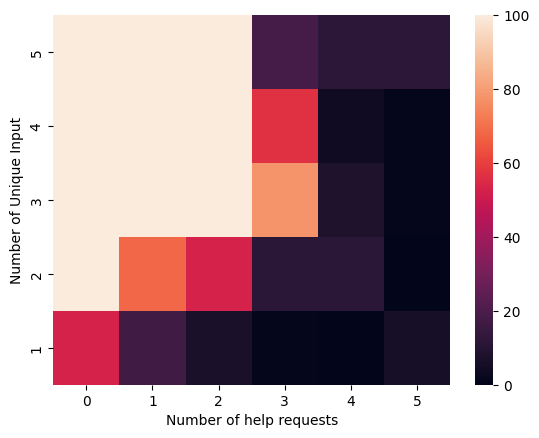

In [23]:
g_cluster['count']=1
hm = g_cluster.groupby([f1,f3]).count().reset_index().pivot(index=f3,columns=f1,values='count').fillna(0).astype(int)
ax = sns.heatmap(hm,vmax=100)
ax.invert_yaxis()

## Q2.3 – (1 point)

Provide an interpretation of the resulting clusters. What was the result of the clustering? How did it compare to what you were expecting when selecting the features to cluster? Does it provide useful insights into the relationship between those variables? Provide at least one image of the clusters to support your analysis.

The great majority of of datapoints have a high number of unique inputs and a low number of help requests.
Looking at a heatmap of the data, we can see that over 4000 students have exactly 5 for `Number of Unique Input` and 0 `Number of help requests`:

![Heatmap with Annotations](./3_means_gaming_heat_1.png)

Even when limiting the highest coloring to 100, we see most students still exhibit the pattern of high `Number of Unique Input` and low `Number of help requests`:

![Heatmap vmax=200](./3_means_gaming_heat_2.png)

Thus, the clustering algorithm only managed to really define 2 consistent groupings: students with high `Number of Unique Input` and low `Number of help requests`, and the rest of the students. Here are a few runs of the clustering algorithm:

![](./3_means_gaming_1.png)
![](./3_means_gaming_2.png)
![](./3_means_gaming_3.png)

The most consistent cluster is the aforementioned grouping, seen in the top-left of the plots. The two other clusters change frequently in respect of which one overtakes the points in the middle. Nevertheless, the points in the left and top always fall in different groupings. I would imagine a good clustering for the data might use 4 clusters and look like this:

![](./3_means_gaming_6.png)

However, using 4 clusters did not yield consistent results in how the 3 previously established clusters were divided:

![](./3_means_gaming_4.png)
![](./3_means_gaming_5.png)

In conclusion, I don't think there is enough for k-means to use within these two features to generate good clusters. Still, the insight of grouping students with high `Number of help requests` and high `Number of Unique Input` is interesting. I lean towards interpreting this as highly engaged students, considering there are very few in that clustering.